In [0]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [0]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pariharatul21","key":"30f47b1815f7f2544b9ae9c8c9b7ed81"}'}

In [0]:
!cp kaggle.json ~/.kaggle/

In [0]:
!kaggle datasets list

ref                                                     title                                              size  lastUpdated          downloadCount  
------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  
himanshupoddar/zomato-bangalore-restaurants             Zomato Bangalore Restaurants                       88MB  2019-03-31 09:48:43           4838  
thegurus/spanish-high-speed-rail-system-ticket-pricing  Spanish High Speed Rail tickets pricing - Renfe    27MB  2019-05-10 06:50:30           1229  
crisparada/brazilian-cities                             Brazilian Cities                                  935KB  2019-05-24 20:49:21           1890  
chicago/chicago-copa-cases                              Chicago COPA Cases                                  3MB  2019-04-05 00:00:32           1802  
taniaj/australian-election-2019-tweets                  Australian Election 2019 Tweets             

In [0]:
!chmod 600 /root/.kaggle/kaggle.json

In [0]:
!kaggle datasets download -d deadskull7/fer2013
#!kaggle datasets download -d cfpb/us-consumer-finance-complaints
!ls

 92% 89.0M/96.6M [00:01<00:00, 65.9MB/s]
100% 96.6M/96.6M [00:01<00:00, 90.6MB/s]
fer2013.zip  kaggle.json  sample_data


In [0]:
import pandas as pd
data2 = pd.read_csv('/content/fer2013.zip', compression='zip', header=0, sep=',', quotechar='"')

In [0]:
from zipfile import ZipFile
zip_file = ZipFile('/content/fer2013.zip')
#fields= ['product','consumer_complaint_narrative'] 
data=pd.read_csv(zip_file.open('fer2013.csv'))
data.head()

,emotion,pixels,Usage
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...,Training
1,0,151 150 147 155 148 133 111 140 170 174 182 15...,Training
2,2,231 212 156 164 174 138 161 173 182 200 106 38...,Training
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...,Training
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...,Training


In [0]:
!pip install keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.layers.normalization import BatchNormalization


Using TensorFlow backend.


In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from sklearn.model_selection import train_test_split

In [0]:
labels = data.iloc[:,[0]].values

In [0]:
pixels = data['pixels']

In [0]:
Expressions = {0:"Angry", 1:"Disgust", 2:"Fear", 3:"Happy", 4:"Sad", 5:"Surprise", 6:"Neutral"}
from keras.utils import to_categorical

In [0]:
labels = to_categorical(labels, len(Expressions))

In [0]:
# converting pixels to grayscale images of 48x48
images = np.array([np.fromstring(pixel, dtype='int', sep=' ')for pixel in pixels])
images = images/255.0
images = images.reshape(images.shape[0], 48, 48, 1).astype('float32')

'Disgust'

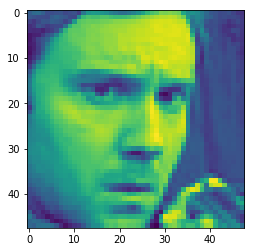

In [0]:
plt.imshow(images[0][:,:,0])
Expressions[labels[0][0]]

In [0]:
train_images, test_images, train_labels, test_labels = train_test_split(images,labels, test_size=0.2, random_state=0)

In [0]:
train_labels

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]], dtype=float32)

In [0]:
train_images

array([[[[0.6627451 ],
         [0.67058825],
         [0.6901961 ],
         ...,
         [0.6627451 ],
         [0.65882355],
         [0.6627451 ]],

        [[0.6784314 ],
         [0.69803923],
         [0.69411767],
         ...,
         [0.67058825],
         [0.654902  ],
         [0.6627451 ]],

        [[0.7019608 ],
         [0.7019608 ],
         [0.7137255 ],
         ...,
         [0.6117647 ],
         [0.6745098 ],
         [0.6627451 ]],

        ...,

        [[0.7411765 ],
         [0.7176471 ],
         [0.65882355],
         ...,
         [0.05098039],
         [0.2784314 ],
         [0.6156863 ]],

        [[0.7529412 ],
         [0.7294118 ],
         [0.6509804 ],
         ...,
         [0.02352941],
         [0.23529412],
         [0.6313726 ]],

        [[0.8039216 ],
         [0.7490196 ],
         [0.6509804 ],
         ...,
         [0.00784314],
         [0.21568628],
         [0.60784316]]],


       [[[0.21176471],
         [0.22745098],
         [0.17

In [0]:
# CREATE THE MODEL
def convolutional_neural_network(classes):
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(2,2), strides=(1,1), activation='relu', input_shape=(48, 48, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(64, kernel_size=(2,2), strides=(1,1), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(128, kernel_size=(2,2), strides=(1,1), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
  model.add(Dropout(0.25))
  
  model.add(Conv2D(256, kernel_size=(2,2), strides=(1,1), activation='relu'))
  model.add(BatchNormalization())
  model.add(MaxPooling2D(pool_size=(2,2), strides=(1,1)))
  model.add(Dropout(0.25))
  
  model.add(Flatten())
  
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  
  model.add(Dense(512, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  
  model.add(Dense(classes, activation='softmax'))
  
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
  return model

In [0]:
print(keras.__version__)

2.2.4


In [0]:
classes = 7
model = convolutional_neural_network(classes)
model.summary()

W0624 09:34:26.182258 139898385946496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0624 09:34:26.199923 139898385946496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0624 09:34:26.251842 139898385946496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:174: The name tf.get_default_session is deprecated. Please use tf.compat.v1.get_default_session instead.

W0624 09:34:26.253051 139898385946496 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:181: The name tf.ConfigProto is deprecated. Please use tf.compat.v1.ConfigProto instead.

W0624 09:34:29.033818 139898385946496 depre

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 47, 47, 32)        160       
_________________________________________________________________
batch_normalization_1 (Batch (None, 47, 47, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 22, 22, 64)        8256      
_________________________________________________________________
batch_normalization_2 (Batch (None, 22, 22, 64)        256       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 21, 21, 64)        0         
__________

In [0]:
#train the CNN 
model.fit(train_images,train_labels,batch_size=105,epochs=30,verbose=2)

W0624 09:34:34.782582 139898385946496 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/30
 - 34s - loss: 1.8704 - acc: 0.3360
Epoch 2/30
 - 29s - loss: 1.5527 - acc: 0.4208
Epoch 3/30
 - 29s - loss: 1.3639 - acc: 0.4846
Epoch 4/30
 - 29s - loss: 1.2599 - acc: 0.5241
Epoch 5/30
 - 29s - loss: 1.2171 - acc: 0.5375
Epoch 6/30
 - 29s - loss: 1.1281 - acc: 0.5688
Epoch 7/30
 - 29s - loss: 1.0520 - acc: 0.6029
Epoch 8/30
 - 29s - loss: 1.0051 - acc: 0.6213
Epoch 9/30
 - 29s - loss: 0.9160 - acc: 0.6552
Epoch 10/30
 - 29s - loss: 0.8475 - acc: 0.6854
Epoch 11/30
 - 29s - loss: 0.7511 - acc: 0.7234
Epoch 12/30
 - 29s - loss: 0.6638 - acc: 0.7556
Epoch 13/30
 - 29s - loss: 0.6018 - acc: 0.7791
Epoch 14/30
 - 29s - loss: 0.5179 - acc: 0.8127
Epoch 15/30
 - 29s - loss: 0.4786 - acc: 0.8251
Epoch 16/30
 - 29s - loss: 0.4129 - acc: 0.8519
Epoch 17/30
 - 29s - loss: 0.3415 - acc: 0.8771
Epoch 18/30
 - 29s - loss: 0.3156 - acc: 0.8870
Epoch 19/30
 - 29s - loss: 0.2807 - acc: 0.9023
Epoch 20/30
 - 29s - loss: 0.2517 - acc: 0.9106
Epoch 21/30
 - 29s - loss: 0.2396 - acc: 0.9141
E

In [0]:
!pip install -U -q PyDrive

     |████████████████████████████████| 993kB 2.8MB/s 


In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
# 1. Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
import logging

logging.getLogger('googleapicliet.discovery_cache').setLevel(logging.ERROR)

In [0]:


# 2. Save the weights of the traines Keras model on the Google Drive
model.save("model.h5")
model_file = drive.CreateFile({"title":"model.h5"})
model_file.SetContentFile("model.h5")
model_file.Upload()

In [0]:
# download to google drive
drive.CreateFile({'id': model_file.get('id')})

GoogleDriveFile({'id': '1dxyBBviUmM-giQgVHdWsgfG7RMuq1DHA'})